In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


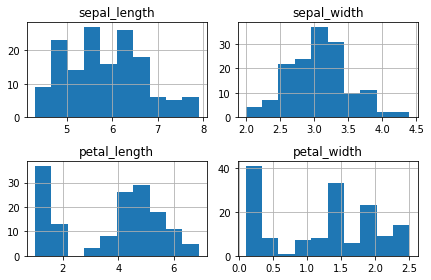

In [8]:
iris.hist()
plt.tight_layout()

In [9]:
iris['petal_width'].std()

0.7622376689603465

In [10]:
def std_population(arr):
    ssquare = sum((arr - np.mean(arr))**2)/(len(arr)-1)
    return np.sqrt(ssquare)

In [11]:
std_population(iris['petal_width'])

0.7622376689603464

In [12]:
round(iris['petal_width'].std(),3) == round(std_population(iris['petal_width']),3)

True

In [13]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
setosa = iris[iris['species'] == "setosa"]
versicolor = iris[iris['species'] == "versicolor"]
virginica = iris[iris['species'] == "virginica"]

In [15]:
empty_list = []
for i in iris['species']:
    if i != 'virginica':
        empty_list.append(False)
    else:
        empty_list.append(True)

In [16]:
iris[pd.Series(empty_list)].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


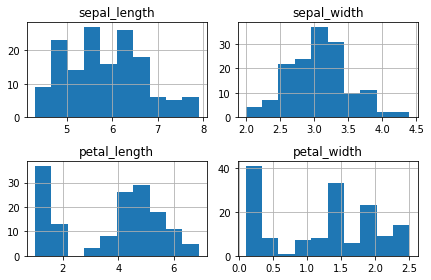

In [17]:
iris.hist()
plt.tight_layout()

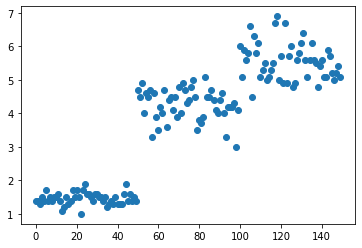

In [18]:
plt.scatter(range(len(iris)),iris['petal_length'])

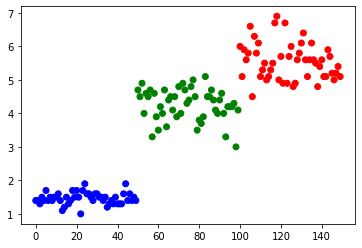

In [19]:
colors = []
for i in range(150):
    if i%3 == 0:
        colors.append('r')
    if i%3 == 1:
        colors.append('g')
    if i%3 == 2:
        colors.append('b')
colors.sort()

plt.scatter(range(len(iris)),iris['petal_length'],color = colors)

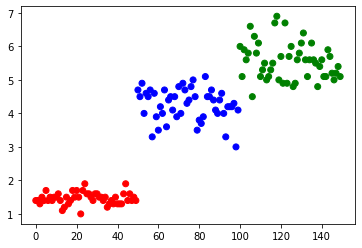

In [20]:
colors = {'setosa':'r','versicolor':'b','virginica':'g'}
plt.scatter(range(len(iris)),iris['petal_length'],color = iris['species'].map(colors))

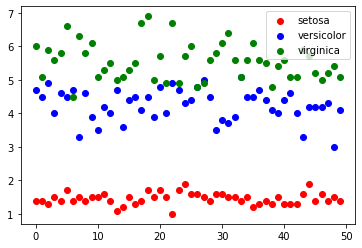

In [21]:
plt.scatter(range(len(setosa)),setosa['petal_length'],color='r',label='setosa')
plt.scatter(range(len(versicolor)),versicolor['petal_length'],color='b',label='versicolor')
plt.scatter(range(len(virginica)),virginica['petal_length'],color='g',label='virginica')
plt.legend()

In [22]:
setosa['petal_length'].min()

1.0

Text(0.5, 1.0, 'distribution of the petal length of different iris species')

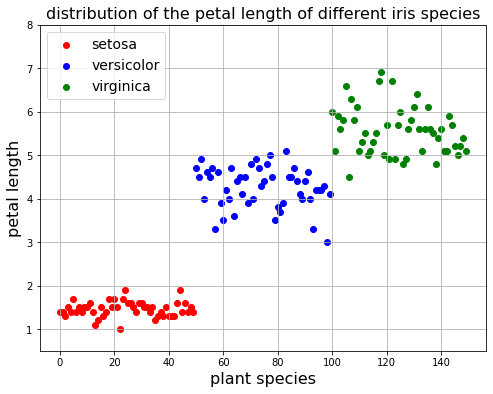

In [23]:
additional_list = [0] * 100
setosa_pl = list(setosa['petal_length'])
setosa_pl = setosa_pl + additional_list

additional_list = [0] * 50
versicolor_pl = list(versicolor['petal_length'])
versicolor_pl = additional_list + versicolor_pl + additional_list

additional_list = [0] * 100
virginica_pl = list(virginica['petal_length'])
virginica_pl = additional_list + virginica_pl

fsize = 16
plt.figure(figsize=(8,6))
plt.scatter(range(len(setosa_pl)),setosa_pl,color='r',label='setosa')#str(round(np.mean(setosa['petal_length']),2))
#plt.axhline(np.mean(setosa['petal_length']), color='r')
plt.scatter(range(len(versicolor_pl)),versicolor_pl,color='b',label='versicolor')
plt.scatter(range(len(virginica_pl)),virginica_pl,color='g',label='virginica')
plt.ylim(0.5,8)
plt.grid()
plt.legend(loc="upper left",fontsize=fsize-2)
plt.xlabel("plant species",fontsize=fsize)
plt.ylabel("petal length",fontsize=fsize)
plt.title("distribution of the petal length of different iris species", fontsize=fsize)

In [24]:
stats.ttest_ind(setosa['petal_length'],versicolor['petal_length']) # --> significant p < a == 0.05 

Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)

In [25]:
stats.ttest_ind(setosa['petal_length'],virginica['petal_length']) 

Ttest_indResult(statistic=-49.98618625709594, pvalue=1.5048006992427275e-71)

In [26]:
stats.ttest_ind(versicolor['petal_length'],virginica['petal_length']) 

Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

In [27]:
stats.shapiro(iris['petal_length'])

ShapiroResult(statistic=0.8762688040733337, pvalue=7.412849778454245e-10)

In [28]:
stats.mannwhitneyu(setosa['petal_length'],virginica['petal_length'])

MannwhitneyuResult(statistic=0.0, pvalue=5.665214485738232e-18)

In [29]:
stats.wilcoxon(setosa['petal_length'],virginica['petal_length'])

WilcoxonResult(statistic=0.0, pvalue=7.463471219275886e-10)

In [31]:
stats.normaltest(iris['petal_length'])

NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)

In [33]:
stats.mannwhitneyu(versicolor['petal_length'],virginica['petal_length']) 

MannwhitneyuResult(statistic=44.5, pvalue=9.133544727668256e-17)

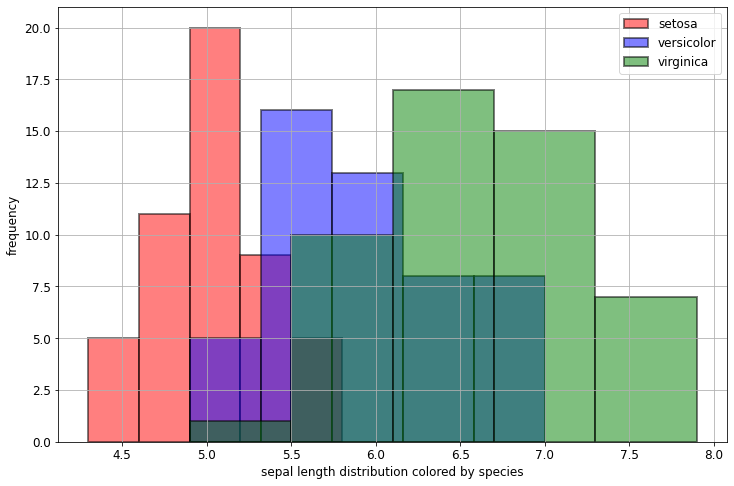

In [34]:
figure = plt.figure(figsize=(12,8))

plt.rcParams['font.size'] = 12
plt.hist(iris[iris['species'] == 'setosa']['sepal_length'], bins=5,color='r', edgecolor='black', linewidth=2, alpha=0.5, label='setosa')
plt.hist(iris[iris['species'] == 'versicolor']['sepal_length'], bins=5,color='b', edgecolor='black', linewidth=2, alpha=0.5, label='versicolor')
plt.hist(iris[iris['species'] == 'virginica']['sepal_length'], bins=5,color='g', edgecolor='black', linewidth=2, alpha=0.5, label='virginica')
plt.xlabel('sepal length distribution colored by species')
plt.ylabel('frequency')
plt.legend()
plt.grid()
plt.show()

In [35]:
std_population(setosa['petal_width'])

0.10538558938004569

In [36]:
std_population(virginica['petal_width'])

0.27465005563666733

In [37]:
std_population(versicolor['petal_width'])

0.197752680004544

In [38]:
def std_error_mean(arr):
    sigma = std_population(arr)
    return sigma/np.sqrt(len(arr))

In [39]:
import scipy.stats as stats

In [40]:
std_error_mean(iris['petal_width'])

0.062236445056044275

In [41]:
stats.sem(iris['petal_width'])

0.06223644505604428

In [42]:
res = stats.shapiro(iris['petal_width'])

In [43]:
res.pvalue

1.6802413682626138e-08

<AxesSubplot:>

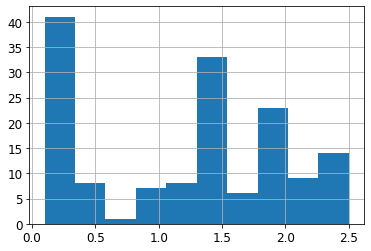

In [44]:
iris['petal_width'].hist()

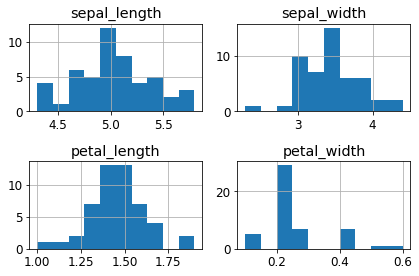

In [45]:
setosa.hist()
plt.tight_layout()

In [46]:
stats.pearsonr(setosa['petal_length'],setosa['petal_width'])

(0.33163004080411873, 0.018638915007537234)

In [49]:
stats.shapiro(setosa['petal_width'])

ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07)

In [50]:
stats.normaltest(setosa['petal_width'])

NormaltestResult(statistic=14.938723582242247, pvalue=0.0005702921462706576)

In [51]:
stats.shapiro(versicolor['petal_width'])

ShapiroResult(statistic=0.947626531124115, pvalue=0.027278218418359756)

In [52]:
stats.normaltest(versicolor['petal_width'])

NormaltestResult(statistic=0.32741606910241755, pvalue=0.8489898614040613)

In [53]:
stats.shapiro(virginica['petal_width'])

ShapiroResult(statistic=0.9597718715667725, pvalue=0.08695744723081589)

In [54]:
stats.normaltest(virginica['petal_width'])

NormaltestResult(statistic=1.2383770472082007, pvalue=0.5383811439725827)

In [55]:
#values from a standard normal distribution
x1 = np.random.normal(0,1,1000)
x2 = np.random.normal(0,1,1000)

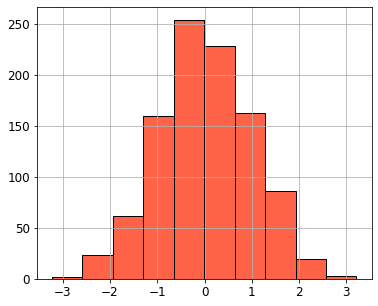

In [56]:
plt.figure(figsize=(6,5))
plt.hist(x1,color="tomato",edgecolor='black')
plt.grid()

In [57]:
#testing for normal distribution
stats.normaltest(x1)

NormaltestResult(statistic=0.9135611361586347, pvalue=0.6333192952859665)

In [58]:
stats.shapiro(x1)

ShapiroResult(statistic=0.9986141324043274, pvalue=0.6305720210075378)

In [59]:
np.mean(x1) == np.mean(x2)

False

In [60]:
np.mean(x1)

0.02310897911088722

In [61]:
np.mean(x2)

0.04552844384474258

In [62]:
stats.ttest_ind(x1,x2) #we have to accept the null hypothesis

Ttest_indResult(statistic=-0.5069153673779088, pvalue=0.6122701409863954)

In [64]:
def ttest_two_sample(x1,x2):
    x1_mean = np.mean(x1)
    x2_mean = np.mean(x2)
    temp = np.sum((x1 - x1_mean)**2) + np.sum((x2 - x2_mean)**2)
    var = temp/(len(x1)+len(x2)-2)
    t = (x1_mean - x2_mean)/np.sqrt(var*((1/len(x1))+(1/len(x2))))
    return t

In [65]:
ttest_two_sample(x1,x2)

-0.5069153673779088